In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Dados_PRF_2022.csv', encoding = 'latin1', sep = ';')

In [5]:
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405151,2022-01-01,sábado,01:35:00,PI,316.0,415,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,1,0,1,2,"-7,43280012","-40,68261908",SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,2022-01-01,sábado,02:40:00,PR,116.0,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,0,0,1,1,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,2022-01-01,sábado,05:22:00,MS,163.0,393,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,0,1,2,"-21,228445","-54,456296",SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,2022-01-01,sábado,07:00:00,RJ,101.0,457,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,...,1,1,0,1,2,"-23,03149804","-44,17715297",SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
4,405207,2022-01-01,sábado,09:00:00,MG,40.0,"508,3",RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,...,0,3,0,0,1,"-19,76061249","-44,1347544",SPRF-MG,DEL02-MG,UOP01-DEL02-MG


In [6]:
df.shape

(64547, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64547 entries, 0 to 64546
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      64547 non-null  int64  
 1   data_inversa            64547 non-null  object 
 2   dia_semana              64547 non-null  object 
 3   horario                 64547 non-null  object 
 4   uf                      64547 non-null  object 
 5   br                      64350 non-null  float64
 6   km                      64350 non-null  object 
 7   municipio               64547 non-null  object 
 8   causa_acidente          64547 non-null  object 
 9   tipo_acidente           64547 non-null  object 
 10  classificacao_acidente  64547 non-null  object 
 11  fase_dia                64547 non-null  object 
 12  sentido_via             64547 non-null  object 
 13  condicao_metereologica  64547 non-null  object 
 14  tipo_pista              64547 non-null

In [8]:
df.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        197
km                        197
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    3
delegacia                 759
uop                        48
dtype: int64

In [9]:
df_nulos = df[df.isnull().any(axis=1)]
df_nulos.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
49,405687,2022-01-03,segunda-feira,11:30:00,RR,174.0,503,BOA VISTA,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,0,0,2,"2,794901","-60,698441",SPRF-RR,NaN,UOP01-DEL01-RR
207,407210,2022-01-07,sexta-feira,01:30:00,RR,174.0,318,CARACARAI,Reação tardia ou ineficiente do condutor,Colisão com objeto,...,1,1,0,1,1,"1,49675231","-60,94122833",SPRF-RR,NaN,UOP01-DEL01-RR
248,407393,2022-01-08,sábado,02:00:00,AP,210.0,2,MACAPA,Ingestão de álcool pelo condutor,Colisão com objeto,...,0,1,0,1,2,"0,08282017","-51,07776189",SPRF-AP,NaN,UOP01-DEL01-AP
474,408564,2022-01-14,sexta-feira,12:00:00,RR,174.0,504,BOA VISTA,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,3,0,1,2,"2,801374","-60,694801",SPRF-RR,NaN,UOP01-DEL01-RR
493,408663,2022-01-14,sexta-feira,20:30:00,BA,NaN,NaN,BARREIRAS,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,"-12,1376959","-44,921313",SPRF-BA,DEL10-BA,UOP01-DEL10-BA


In [10]:
df = df.dropna(subset=['uop', 'br', 'km'])

In [11]:
df.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                          0
km                          0
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    0
delegacia                 734
uop                         0
dtype: int64

In [12]:
vetor = df['uop'][0].split('-')

print(vetor)

'-'.join(vetor)[6:]

['UOP03', 'DEL04', 'PI']


'DEL04-PI'

In [13]:
df['delegacia'] = df['delegacia'].fillna(df['uop'].apply(lambda x: '-'.join(x.split('-')[1:])))

In [14]:
df.query('id == 405687')

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
49,405687,2022-01-03,segunda-feira,11:30:00,RR,174.0,503,BOA VISTA,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,0,0,2,"2,794901","-60,698441",SPRF-RR,DEL01-RR,UOP01-DEL01-RR


In [15]:
df.isnull().sum().sum()

np.int64(0)

# Fim do Tratamento

In [16]:
df['uf'].unique()

array(['PI', 'PR', 'MS', 'RJ', 'MG', 'PB', 'SC', 'CE', 'MT', 'PE', 'BA',
       'GO', 'SP', 'DF', 'RS', 'ES', 'RR', 'PA', 'RN', 'MA', 'AL', 'SE',
       'RO', 'TO', 'AP', 'AM', 'AC'], dtype=object)

In [20]:
Regiao_Norte = df[df['uf'].isin(['PA', 'AM', 'RR', 'RO', 'AC', 'AP', 'TO'])]
Regiao_Nordeste = df[df['uf'].isin(['MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE'])]
Regiao_Centro_Oeste = df[df['uf'].isin(['MT', 'MS', 'GO', 'DF'])]
Regiao_Sudeste = df[df['uf'].isin(['MG', 'ES', 'RJ', 'SP'])]
Regiao_Sul = df[df['uf'].isin(['PR', 'SC', 'RS'])]

In [52]:
norte = ['PA', 'AM', 'RR', 'RO', 'AC', 'AP', 'TO']
nordeste = ['MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']
centro_oeste = ['MT', 'MS', 'GO', 'DF']
sudeste = ['MG', 'ES', 'RJ', 'SP']
sul = ['PR', 'SC', 'RS']

In [53]:
def definir_regiao(estado):
    if estado in norte:
        return 'Norte'
    elif estado in nordeste:
        return 'Nordeste'
    elif estado in centro_oeste:
        return 'Centro Oeste'
    elif estado in sudeste:
        return 'Sudeste'
    else:
        return 'Sul'

In [54]:
df['regiao'] = df['uf'].apply(lambda x: definir_regiao(x))

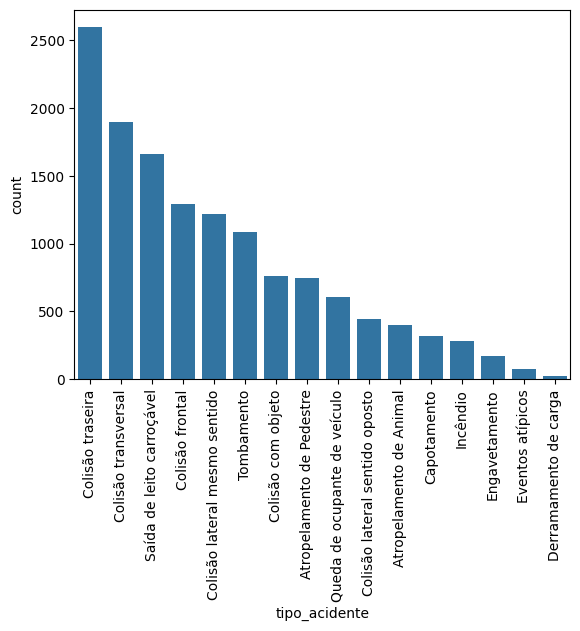

In [34]:
sns.barplot(x=Regiao_Nordeste['tipo_acidente'].value_counts().index, y=Regiao_Nordeste['tipo_acidente'].value_counts())
plt.xticks(rotation=90)
plt.show()

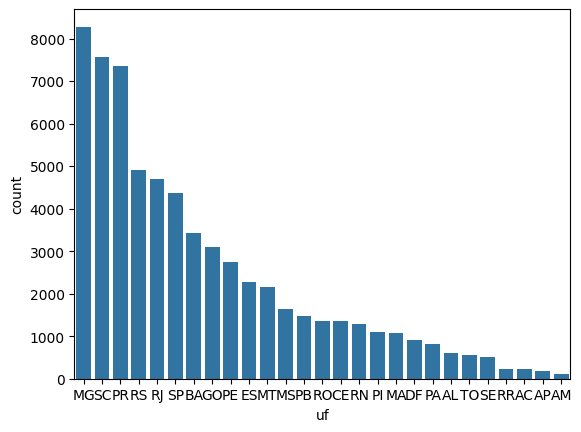

In [50]:
sns.barplot(x=df['uf'].value_counts().index, y=df['uf'].value_counts())
plt.show()

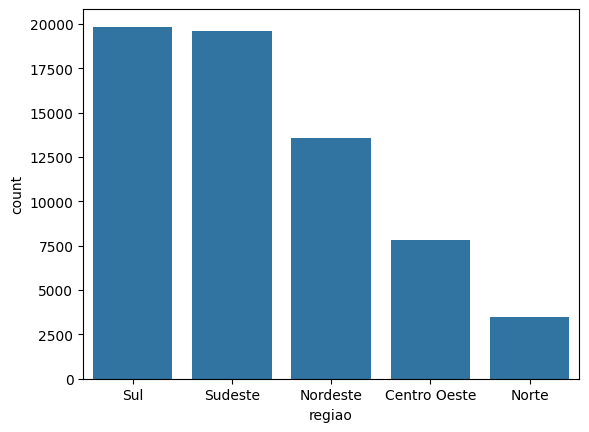

In [56]:
sns.barplot(x=df['regiao'].value_counts().index, y=df['regiao'].value_counts())
plt.show()

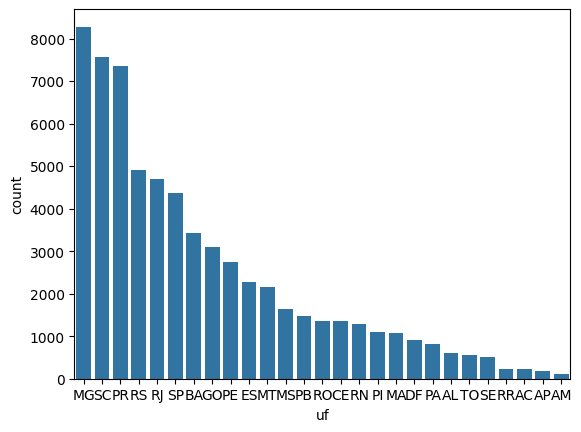

In [48]:
sns.barplot(x=df['uf'].value_counts().index, y=df['uf'].value_counts())
plt.show()

In [99]:
df.query('regiao == "Norte"')['mortos'].reset_index().sum()

index     112608853
mortos          431
dtype: int64

In [104]:
df_filtrado = df[(df['regiao'].isin(['Norte', 'Sul'])) & (df['mortos'] > 0)]

df_mortes = df_filtrado.groupby('regiao')['mortos'].sum().reset_index()

df_mortes

,regiao,mortos
0,Norte,431
1,Sul,1255


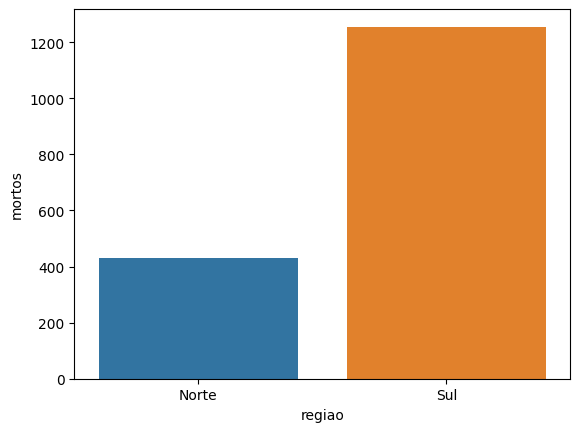

In [105]:
sns.barplot(df_mortes, x='regiao', y='mortos', hue='regiao')
plt.show()